In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
file1="c:/temp/psysed.csv"
psysed=pd.read_csv(file1)
psysed

,id,flexibility,speed,strength
0,1,3.600000,6.11,2.07
1,2,1.120000,0.33,9.01
2,3,8.690000,8.90,3.83
3,4,2.670000,8.61,0.36
4,5,2.780000,1.69,8.64
...,...,...,...,...
75,76,2.440000,1.60,8.51
76,77,2.340000,1.66,8.91
77,78,5.080000,1.05,5.46
78,79,1.670000,0.87,8.70


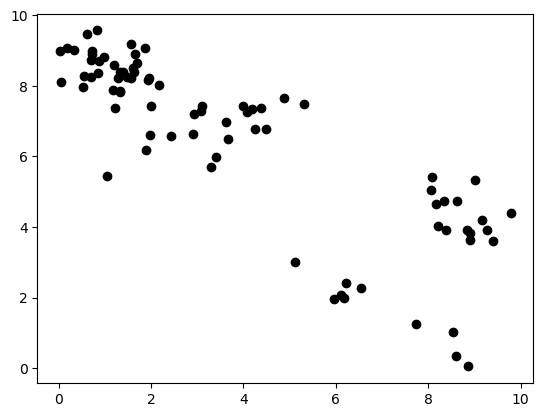

In [4]:
# K-means Clustering

# 먼저 분포 그냥 한 번 보자
plt.scatter(psysed['speed'],psysed['strength'],color='black')
plt.show()

In [8]:
# K-means clustering
X=psysed[['strength','speed']]
X_scaled=StandardScaler().fit_transform(X)

# kmeans_3, k=3
kmeans_3=KMeans(n_clusters=3,random_state=0,n_init=10,max_iter=300)
kmeans_3.fit(X)

KMeans(n_clusters=3, random_state=0)

In [9]:
# 중심점의 위치
kmeans_3.cluster_centers_

array([[8.47885705, 1.14485715],
       [3.27120002, 8.04119999],
       [6.83249999, 3.44850002]])

In [10]:
# WSS : 중심점 까지의 평균 길이 합의 최소
kmeans_3.inertia_

145.70898465322134

In [11]:
# 각 데이터 값이 어디 클러스터에 들어가 있는지?
kmeans_3.labels_

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 0, 0,
       0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 2, 0, 1])

In [12]:
# 각 데이터가 들어간 클러스터 정보를 원 데이터에 넣자
df1=pd.DataFrame(kmeans_3.labels_,columns=['cluster_3'])

psysed_new=pd.concat([psysed,df1],axis=1)
psysed_new

,id,flexibility,speed,strength,cluster_3
0,1,3.600000,6.11,2.07,1
1,2,1.120000,0.33,9.01,0
2,3,8.690000,8.90,3.83,1
3,4,2.670000,8.61,0.36,1
4,5,2.780000,1.69,8.64,0
...,...,...,...,...,...
75,76,2.440000,1.60,8.51,0
76,77,2.340000,1.66,8.91,0
77,78,5.080000,1.05,5.46,2
78,79,1.670000,0.87,8.70,0


In [14]:
pd.value_counts(psysed_new['cluster_3'])

0    35
1    25
2    20
Name: cluster_3, dtype: int64

In [17]:
# kmeans_4, k=4
kmeans_4=KMeans(n_clusters=4,random_state=0,n_init=10,max_iter=300) # max_iter: 중심점 찾기 300번 반복한다.
kmeans_4.fit(X)

KMeans(n_clusters=4, random_state=0)

In [18]:
# 중심점의 위치
kmeans_4.cluster_centers_

array([[8.47885705, 1.14485715],
       [4.35800003, 8.74333337],
       [6.83249999, 3.44850002],
       [1.641     , 6.98799992]])

In [19]:
# WSS : 중심점 까지의 평균 길이 합의 최소
kmeans_4.inertia_

82.92927654836562

In [20]:
# kmeans_5, k=5
kmeans_5=KMeans(n_clusters=5, random_state=0,n_init=10,max_iter=300)
kmeans_5.fit(X)

KMeans(n_clusters=5, random_state=0)

In [21]:
# WSS, k=5, kemans_5 / 중심점이 5개일 때 평균길이 합의 최소
kmeans_5.inertia_

62.555902924982604